In [84]:
from pyvis.network import Network
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

<h1>Converti file csv in pickle</h1>

<h2>Lista di professori del dipartimento di informatica</h2>

In [85]:
with open("./data/professori_dipartimento_inf.txt", "r", encoding="utf-8") as f:
    professori_informatica = [riga.strip() for riga in f]

with open("./data/prof_avuti.txt", "r", encoding="utf-8") as f:
    professori_avuti = [riga.strip() for riga in f]

def normalize_prof(name):
    cognome, nome = [x.strip() for x in name.split(',')]
    return f"{cognome} {nome}"

def aggiustoLista(lista):
    lista = list({normalize_prof(n) for n in lista})
    lista.sort()
    return lista

professori_informatica = aggiustoLista(professori_informatica)
professori_avuti = aggiustoLista(professori_avuti)


print(professori_informatica)
print(professori_avuti)

['Bellettini Giovanni', 'Bozzo Enrico', 'Brajnik Giorgio', 'Burigat Stefano', 'Buttussi Fabio', 'Chittaro Luca', 'Cimatti Alessandro', 'Comini Marco', 'Coppola Paolo', "D'Agostino Giovanna", 'Dattolo Antonina', 'Della Mea Vincenzo', 'Della Monica Dario', 'Di Gianantonio Pietro', 'Dimonte Vincenzo', 'Dovier Agostino', 'Drioli Carlo', 'Fogolari Federico', 'Fontana Federico', 'Formisano Andrea', 'Fortuna Sara', 'Franceschet Massimo', 'Fusiello Andrea', 'Geatti Luca', 'Lancia Giuseppe', 'Lenisa Marina', 'Liessi Davide', 'Maddalena Eddy', 'Mameli Valentina', 'Micheloni Christian', 'Miculan Marino', 'Mirolo Claudio', 'Mizzaro Stefano', 'Montanari Angelo', 'Omero Paolo', 'Pace Luigi', 'Piazza Carla', 'Policriti Alberto', 'Puppis Gabriele', 'Riccio Vincenzo', 'Ritacco Ettore', 'Roitero Kevin', 'Romani Giulio', 'Scagnetto Ivan', 'Serra Giuseppe', 'Vermiglio Rossana', 'Vidoni Paolo']
['Bozzo Enrico', 'Brajnik Giorgio', 'Buttussi Fabio', 'Chittaro Luca', 'Coppola Paolo', "D'Agostino Giovanna", 'D

<h2>DataFrame sugli articoli di Informatica</h2>

In [86]:
df_informatica = pd.read_csv('./data/informatica.csv')

df_informatica.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Mari, M.; Snidaro, L.","Mari, Marco (59388337700); Snidaro, Lauro (650...",59388337700; 6507499895,Survey of Neural Network Approaches to Target ...,2026,Information Fusion,127,NaN,103789,NaN,...,NaN,NaN,NaN,English,Inf. Fusion,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-105017548985
1,"Mari, M.; Snidaro, L.","Mari, Marco (59388337700); Snidaro, Lauro (650...",59388337700; 6507499895,Ensemble of KalmanNets with innovation-based a...,2026,Information Fusion,127,NaN,103777,NaN,...,NaN,NaN,NaN,English,Inf. Fusion,Article,Final,NaN,Scopus,2-s2.0-105017546340
2,"Ceschia, S.; Di Gaspero, L.; Rosati, R.M.; Sch...","Ceschia, Sara (35193496000); Di Gaspero, Luca ...",35193496000; 6505944235; 57406536600; 6701629145,Multi-neighborhood simulated annealing for the...,2026,International Transactions in Operational Rese...,33,1,NaN,38,...,NaN,NaN,NaN,English,Int. Trans. Oper. Res.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85211480324
3,"Pagliarini, R.","Pagliarini, Roberto (25229039800)",25229039800,Differential Flux-Balance Analysis Infers Meta...,2026,Lecture Notes in Computer Science,16051 LNCS,NaN,NaN,155,...,9789819698936; 9789819698042; 9789819698110; 9...,NaN,NaN,English,Lect. Notes Comput. Sci.,Conference paper,Final,NaN,Scopus,2-s2.0-105022894987
4,"Madni, H.A.; Shujat, H.; de Nardin, A.; Zottin...","Madni, Hussain Ahmad (57195220347); Shujat, Ha...",57195220347; 59705771800; 57259162600; 5795942...,FsBAD: Data-efficient feature reconstruction f...,2026,Pattern Recognition Letters,199,NaN,NaN,113,...,NaN,NaN,NaN,English,Pattern Recogn. Lett.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-105021263351


In [87]:
df_informatica.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Correspondence Address', 'Editors', 'Publisher',
       'ISSN', 'ISBN', 'CODEN', 'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID'],
      dtype='object')

<h2>DataFrame sugli articoli di matematica</h2>

In [88]:
df_matematica = pd.read_csv('./data/matematica.csv')

<h2>Funzione per estrarre gli autori dal campo 'Author full names'</h2>

In [89]:
import re

def extract_authors(author_string):
    chunks = [x.strip() for x in author_string.split(';')]
    authors = []
    for c in chunks:
        match = re.match(r"([^,]+),\s*([^(]+)", c)
        if match:
            cognome = match.group(1).strip()
            nome = match.group(2).strip()
            authors.append(f"{cognome} {nome}")
    return authors

In [90]:
import itertools

autori_informatica = set(
    itertools.chain.from_iterable(
        df_informatica["Author full names"].apply(extract_authors)
    )
)
autori_informatica = list(autori_informatica)
autori_informatica

['Wunderer Cornelia B.',
 'Todaro Michela',
 'Fallavollita Francesco',
 'McWilliams Sean T.',
 'Maldera Simone',
 'Maiero Carlo',
 'Zabiński Bartłomiej',
 'Berry Tracey S.',
 'Carbone Antonino',
 'Taševsḱy Marek',
 'Xiao Xiong',
 'Carter J. W.S.',
 'Goldstein Steve',
 'Barroso Regina Cely',
 'Mann Alexander',
 'Omicini Andrea',
 'Blanchette Mathieu',
 'Zecchinato Luca',
 'Sawyer Craig Anthony',
 'Gonzalez Rodrigues M. V.',
 'Tavernier Thomas',
 'Valencia Alfonso',
 'Stevenson Thomas J.',
 'Martinez-Suarez Paula',
 'Ward Raymond D.',
 'Resconi Silvia',
 'Thornberry R. E.',
 'Aranda C. Padilla',
 'Du Yuanyuan',
 'Qiao Fangjian',
 'Altarui Andrea',
 'Geerinck Julie',
 'Palombi Alessandra',
 'Sawyer Lee',
 'Enzenberger Lea',
 'George Simon',
 'Badami Oves',
 'Baba H.',
 'Zanotelli Damiano',
 'Lynn David',
 'Raghunathan Anand',
 'Maddalena Eddy',
 'Järveläinen Hanna',
 'Salemi G.',
 'Zucker Michael E.',
 'Ocello Elisabetta',
 'Choo Jiyeon',
 'Winkel Federico I.',
 'Brewster Stephen Anthony'

In [91]:
autori_matematica = set(
    itertools.chain.from_iterable(
        df_matematica["Author full names"].apply(extract_authors)
    )
)
autori_matematica = list(autori_matematica)
autori_matematica

['Wunderer Cornelia B.',
 'Todaro Michela',
 'Conidi M. C.',
 'Pin Massimo',
 'Lazarev A. B.',
 'Chikovani Leila D.',
 'Schultens Martin J.',
 'Fallavollita Francesco',
 'Maiero Carlo',
 'Ishida Katsuhiko',
 'Zabiński Bartłomiej',
 'Denis R. D.St',
 'Gonzalvo Rodriguez G. R.',
 'Ghislain P.',
 'Berry Tracey S.',
 'Taševsḱy Marek',
 'Xiao Xiong',
 'Carter J. W.S.',
 'Mann Alexander',
 'Omicini Andrea',
 'Panse Ralf',
 'Bach Matthias Jakob',
 'Blanchette Mathieu',
 'Sawyer Craig Anthony',
 'Gonzalez Rodrigues M. V.',
 'Tavernier Thomas',
 'Valencia Alfonso',
 'Stevenson Thomas J.',
 'Martinez-Suarez Paula',
 'Ward Raymond D.',
 'Resconi Silvia',
 'Thornberry R. E.',
 'Du Yuanyuan',
 'Aranda C. Padilla',
 'Velz T.',
 'Qiao Fangjian',
 'Zahradnik V.',
 'Furini M.',
 'Sawyer Lee',
 'Mittig P.',
 'George Simon',
 'Talyshev Alexey A.',
 'Baba H.',
 'Berriaud Christophe Paul',
 'Castellani Massimiliano',
 'Lynn David',
 'Steele G.',
 'Maddalena Eddy',
 'Järveläinen Hanna',
 'Choo Jiyeon',
 'Wi

<h3>Lista degli autori degli articoli di informatica che sono anche professori</h3>

In [92]:
autori_professori_inf = []

for author in autori_informatica:
    if author in professori_informatica:
        autori_professori_inf.append(author)
autori_professori_inf.sort()        

print(autori_professori_inf)

['Bozzo Enrico', 'Brajnik Giorgio', 'Burigat Stefano', 'Buttussi Fabio', 'Chittaro Luca', 'Cimatti Alessandro', 'Comini Marco', 'Coppola Paolo', "D'Agostino Giovanna", 'Dattolo Antonina', 'Della Mea Vincenzo', 'Della Monica Dario', 'Di Gianantonio Pietro', 'Dovier Agostino', 'Drioli Carlo', 'Fogolari Federico', 'Fontana Federico', 'Formisano Andrea', 'Fortuna Sara', 'Franceschet Massimo', 'Fusiello Andrea', 'Geatti Luca', 'Lenisa Marina', 'Maddalena Eddy', 'Mameli Valentina', 'Micheloni Christian', 'Miculan Marino', 'Mirolo Claudio', 'Mizzaro Stefano', 'Montanari Angelo', 'Omero Paolo', 'Piazza Carla', 'Policriti Alberto', 'Puppis Gabriele', 'Riccio Vincenzo', 'Ritacco Ettore', 'Roitero Kevin', 'Scagnetto Ivan', 'Serra Giuseppe', 'Vermiglio Rossana', 'Vidoni Paolo']


<h3>Lista degli autori degli articoli di matematica che sono professori di informatica</h3>

In [93]:
autori_professori_mat_inf = []
for author in autori_matematica:
    if author in professori_informatica:
        autori_professori_mat_inf.append(author)
autori_professori_mat_inf.sort()
print(autori_professori_mat_inf)

['Bellettini Giovanni', 'Bozzo Enrico', 'Brajnik Giorgio', 'Burigat Stefano', 'Buttussi Fabio', 'Chittaro Luca', 'Cimatti Alessandro', 'Comini Marco', 'Coppola Paolo', "D'Agostino Giovanna", 'Dattolo Antonina', 'Della Mea Vincenzo', 'Della Monica Dario', 'Di Gianantonio Pietro', 'Dimonte Vincenzo', 'Dovier Agostino', 'Drioli Carlo', 'Fogolari Federico', 'Fontana Federico', 'Formisano Andrea', 'Fortuna Sara', 'Franceschet Massimo', 'Fusiello Andrea', 'Geatti Luca', 'Lenisa Marina', 'Liessi Davide', 'Maddalena Eddy', 'Mameli Valentina', 'Micheloni Christian', 'Miculan Marino', 'Mirolo Claudio', 'Mizzaro Stefano', 'Montanari Angelo', 'Pace Luigi', 'Piazza Carla', 'Policriti Alberto', 'Puppis Gabriele', 'Riccio Vincenzo', 'Ritacco Ettore', 'Roitero Kevin', 'Romani Giulio', 'Scagnetto Ivan', 'Serra Giuseppe', 'Vermiglio Rossana', 'Vidoni Paolo']


<h3>Professori di informatica che non sono presenti tra gli autori di articoli di matematica</h3>

In [94]:
'''
professori_inf_non_in_mat = []

for author in autori_professori_inf:
    if author not in autori_professori_mat_inf:
        professori_inf_non_in_mat.append(author)
professori_inf_non_in_mat.sort()

print(professori_inf_non_in_mat)
'''

'\nprofessori_inf_non_in_mat = []\n\nfor author in autori_professori_inf:\n    if author not in autori_professori_mat_inf:\n        professori_inf_non_in_mat.append(author)\nprofessori_inf_non_in_mat.sort()\n\nprint(professori_inf_non_in_mat)\n'

In [95]:
professori_inf_non_in_mat = []

for author in professori_informatica:
    if author not in autori_professori_mat_inf:
        professori_inf_non_in_mat.append(author)
professori_inf_non_in_mat.sort()

print(professori_inf_non_in_mat)

['Lancia Giuseppe', 'Omero Paolo']


<h1>Grafico del numero di articoli per professori di informatica</h1>

In [96]:
conteggio_articoli_informatica = Counter()

for autori_str in df_informatica["Author full names"]:
    autori_inf = extract_authors(autori_str)
    for a in autori_inf:
        if a in professori_informatica:   # match professori
            conteggio_articoli_informatica[a] += 1

In [97]:
df_professori_articoli = pd.DataFrame(
    conteggio_articoli_informatica.items(),
    columns=["Professore", "Numero articoli"]
)

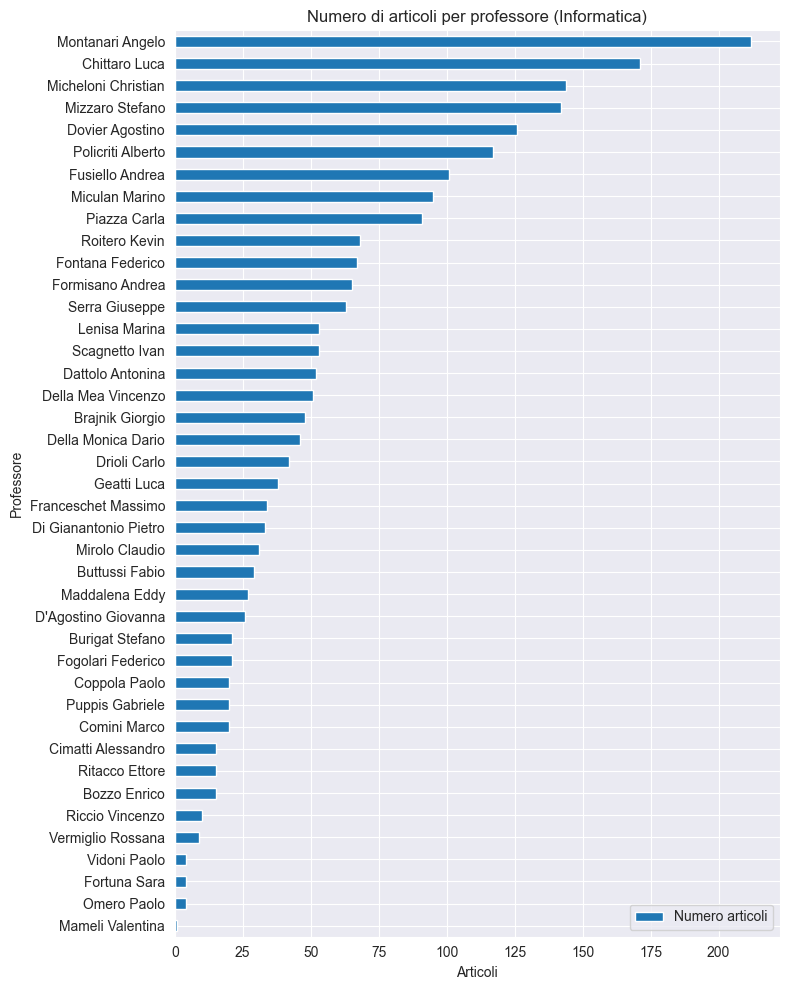

In [98]:
df_professori_articoli.sort_values("Numero articoli").plot(
    x="Professore", y="Numero articoli", kind="barh", figsize=(8,10)
)

plt.title("Numero di articoli per professore (Informatica)")
plt.xlabel("Articoli")
plt.ylabel("Professore")
plt.tight_layout()
plt.show()

<h1>Grafo delle Coauthorship</h1>


In [99]:
def parse_authors(author_string):
    if pd.isna(author_string):
        return []
    chunks = [x.strip() for x in author_string.split(';')]
    authors = []
    for c in chunks:
        match = re.match(r"([^,]+),\s*([^(]+)", c)
        if match:
            cognome = match.group(1).strip()
            nome = match.group(2).strip()
            authors.append(f"{cognome} {nome}")
    return authors

df = df_informatica.copy()
df["author_list"] = df["Author full names"].apply(parse_authors)

df["author_list"].head()
def contains_prof(authors):
    return any(a in professori_informatica for a in authors)

df_inf_prof = df[df["author_list"].apply(contains_prof)].copy()

In [100]:

from itertools import combinations

edges = []

for authors in df_inf_prof["author_list"]:
    # tieni solo gli autori che sono professori DMIF
    profs_in_article = [a for a in authors if a in professori_informatica]

    # se almeno 2 prof presenti → crea arco tra loro
    if len(profs_in_article) > 1:
        for a, b in combinations(sorted(profs_in_article), 2):
            edges.append((a, b))

In [101]:

G = nx.Graph()
from itertools import combinations

edges = []

for authors in df_inf_prof["author_list"]:
    # tieni solo gli autori che sono professori DMIF
    profs_in_article = [a for a in authors if a in professori_informatica]

    # se almeno 2 prof presenti → crea arco tra loro
    if len(profs_in_article) > 1:
        for a, b in combinations(sorted(profs_in_article), 2):
            edges.append((a, b))
for a,b in edges:
    if G.has_edge(a,b):
        G[a][b]["weight"] += 1
    else:
        G.add_edge(a, b, weight=1)

print("Nodi DMIF:", G.number_of_nodes())
print("Archi DMIF:", G.number_of_edges())


degree = nx.degree_centrality(G)
betw = nx.betweenness_centrality(G)

nx.set_node_attributes(G, degree, "degree")
nx.set_node_attributes(G, betw, "betweenness")


Nodi DMIF: 36
Archi DMIF: 67


In [102]:

import community as community_louvain

partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, "community")

import os

net = Network(height="750px", width="100%", notebook=True,cdn_resources="remote",select_menu=True,filter_menu=True)
net.barnes_hut()

# aggiungi nodi
for node, data in G.nodes(data=True):
    if node in professori_avuti:
        gruppo = "professori avuti"
    else:
        gruppo = "professori informatica"
    net.add_node(
        node,
        title=f"{node}\nDegree: {data['degree']:.3f}\nBetweenness: {data['betweenness']:.3f}",
        value=max(data["degree"], 0.01)*40,
        group=data["community"]
    )

# aggiungi archi
for a,b,data in G.edges(data=True):
    net.add_edge(a, b, value=data["weight"])

#os.makedirs("html", exist_ok=True)
net.set_template("html/legend_template.html")
net.show("html/coauthors_informatica_DMIF.html")

html/coauthors_informatica_DMIF.html


In [103]:

density_graph = nx.density(G)
print(density_graph)

0.10634920634920635
